<a href="https://colab.research.google.com/github/Rohit4352/LokSabha_visualization/blob/master/LokSabha_Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loksabha data (2004,2019)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json;

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import the dataset

This notebook uses 4 csv files (2004, 2009, 2014, 2019)

In [2]:
df_2004 = pd.read_csv("LokSabha2004.csv")
df_2009 = pd.read_csv("LokSabha2009.csv")
df_2014 = pd.read_csv("LokSabha2014.csv")
df_2019 = pd.read_csv("LokSabha2019.csv")

Create a year stamp on each dataset

In [3]:
df_2004["Year"] = 2004
df_2009["Year"] = 2009
df_2014["Year"] = 2014
df_2019["Year"] = 2019
Frames = [df_2004,df_2009,df_2014,df_2019]

Concat the dataset axis=1

In [4]:
Data = pd.concat(Frames)
Data

,Candidate,Party,Criminal Cases,Education,Age,City,Year
0,MANORANJAN BHAKTA,INC,0,Post Graduate,65,Andaman & Nicobar Islands,2004
1,A K BISWAS,BSP,0,Graduate,61,Andaman & Nicobar Islands,2004
2,ASIT BARAN DUTTA,IND,0,Graduate,50,Andaman & Nicobar Islands,2004
3,BISHNU PADA RAY,BJP,0,Graduate,54,Andaman & Nicobar Islands,2004
4,DEEPAK BISWAS,IND,0,Not Given,28,Andaman & Nicobar Islands,2004
...,...,...,...,...,...,...,...
7963,Maksuda Khatun,CPI(M),0,Doctorate,58,ULUBERIA,2019
7964,Minati Sarkar,SUCI(C),0,Graduate,61,ULUBERIA,2019
7965,Shoma Ranisree Roy\t,INC,0,Post Graduate,40,ULUBERIA,2019
7966,Simal Saren,Indian Unity Centre,0,Graduate Professional,33,ULUBERIA,2019


# Exploratory Analysis
To begin this exploratory analysis, import libraries and define functions for plotting the data using matplotlib, seaborn.

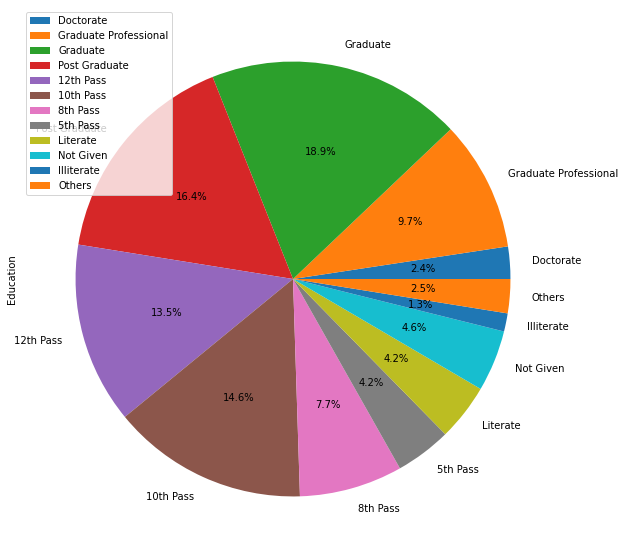

In [5]:
df1 = pd.DataFrame(Data['Education'].value_counts(normalize=True),
                   index=['Doctorate','Graduate Professional', 'Graduate','Post Graduate','12th Pass','10th Pass','8th Pass','5th Pass','Literate','Not Given','Illiterate','Others'])
plot = df1.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(10, 10))



> More than 25% of politicians are not enough literate to govern the city.


# Relational Graphs

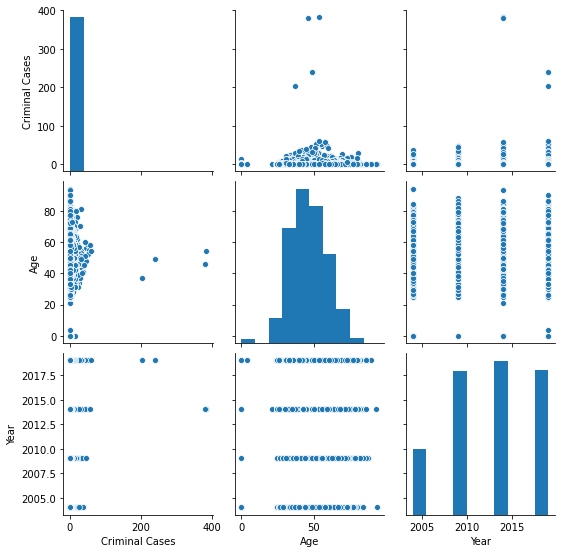

In [6]:
sns.pairplot(Data);

Criminal cases for the candidate of age 40-60 is higher.
Criminal cases seems to be higher in 2019

# **Education bar plot**

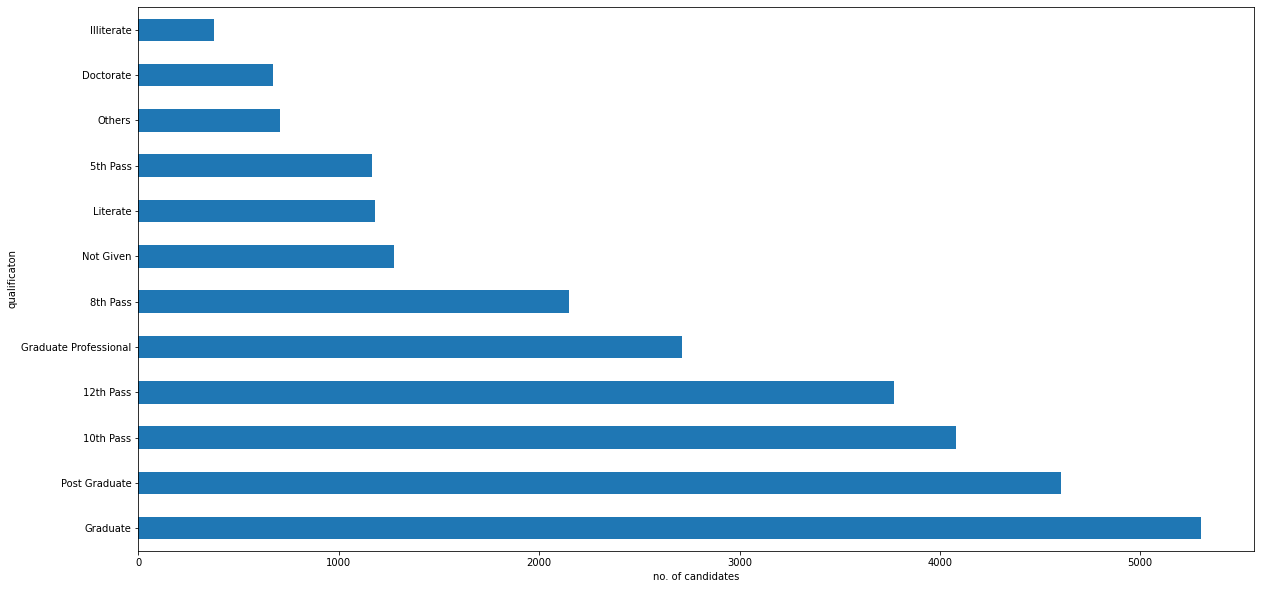

In [7]:
Data['Education'].value_counts().plot(kind='barh', figsize=(20,10))
plt.xlabel("no. of candidates")
plt.ylabel("qualificaton");

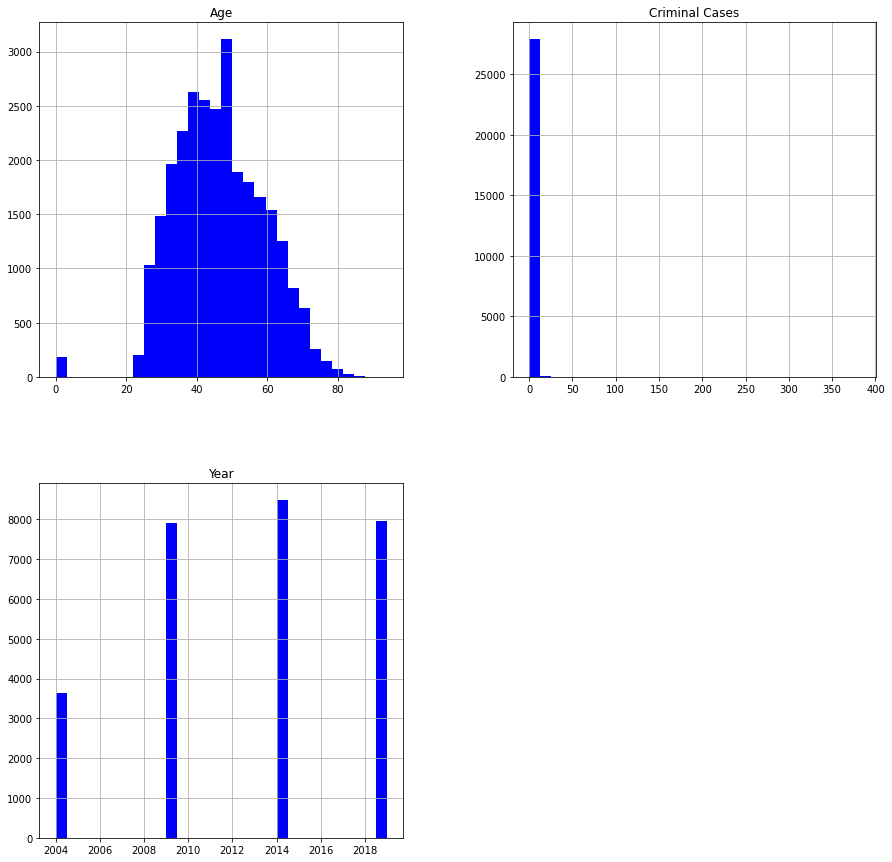

In [8]:
Data.hist(bins = 30, figsize=(15,15), color= 'Blue');

# **Data sorted by criminal records**

In [9]:
df1 = pd.DataFrame(Data.groupby('Party')['Criminal Cases'].nunique())
df1.sort_values(by=['Criminal Cases'], inplace=True)
df1

,Criminal Cases
Party,
A-Chik National Congress(Democratic),1
National Womens Party,1
Nationalist Democratic Progressive Party,1
Nationalist Janshakti Party,1
Nationalist Justice Party,1
...,...
BSP,19
SP,20
INC,21


Parties with highest no. of criminal records

In [10]:
df1[df1['Criminal Cases']>=10]

,Criminal Cases
Party,
CPI,10
CPI(ML)L,11
CPI(ML)(L),12
RJD,12
AAP,12
JD(U),13
CPI(M),13
SHS,14
NCP,14


Parties with least number of criminal record

In [11]:
df1[df1['Criminal Cases']==1]

,Criminal Cases
Party,
A-Chik National Congress(Democratic),1
National Womens Party,1
Nationalist Democratic Progressive Party,1
Nationalist Janshakti Party,1
Nationalist Justice Party,1
...,...
Desh Janhit Party,1
Engineers Party,1
FCI,1


# City with highest crime

In [12]:
df2 = pd.DataFrame(Data.groupby('City')['Criminal Cases'].nunique())
df2.sort_values(by=['Criminal Cases'], inplace=True)
df2 = df2[df2["Criminal Cases"]>=8]

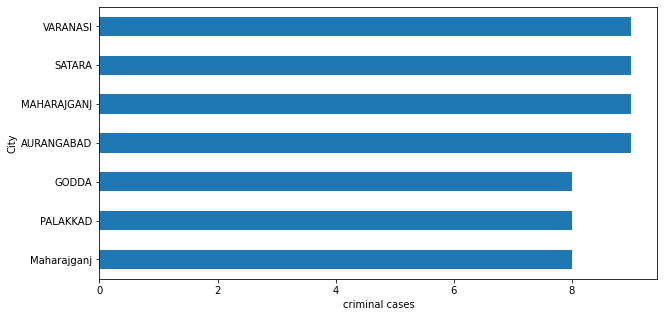

In [13]:
df2['Criminal Cases'].plot(kind='barh', figsize=(10,5))
plt.xlabel("criminal cases");

# Candidate with most cases

In [14]:
df3 = Data.sort_values(by=['Criminal Cases']).tail(10)
df3 

,Candidate,Party,Criminal Cases,Education,Age,City,Year
2427,KAMESHWAR BAITHA,JMM,46,10th Pass,56,Palamau,2009
2267,Kameshwar Baitha,AITC,48,10th Pass,59,PALAMAU,2014
6031,Bapu Rao Soyam,BJP,52,12th Pass,52,ADILABAD,2019
7627,Atiq Ahmad,IND,53,8th Pass,55,PHULPUR : BYE ELECTION ON 11-03-2018,2014
8228,Sridip Bhattacharya,CPI(M),57,Graduate Professional,58,HOWRAH,2014
7432,Ateek Ahmad,IND,59,8th Pass,54,VARANASI,2019
2818,Dean Kuriakose,INC,204,Post Graduate,37,IDUKKI,2019
2908,K Surendran,BJP,240,Graduate,49,PATHANAMTHITTA,2019
6056,M.pushparayan,AAP,380,Post Graduate,46,THOOTHUKKUDI,2014
5714,Udayakumar S.p.,AAP,382,Doctorate,54,KANNIYAKUMARI,2014


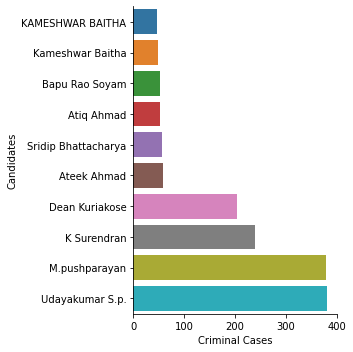

In [15]:
sns.catplot(x="Criminal Cases",y="Candidate",data=df3, kind="bar");
plt.ylabel("Candidates");

$$\textrm{If you like the work please upvote :-) }$$
**$$\textrm{Comments are Welcome}$$**